# Clustering of Columns

## Setup

### Import Required Packages

In [47]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.sparse import hstack
import seaborn as sns

BITOME_KB_PATH = Path('..', 'bitome-kb')
sys.path.append(BITOME_KB_PATH.absolute().as_posix())

from bitome.core import Bitome

### Load Pre-Prepared Bitome Knowledgebase

In [2]:
bitome = Bitome.init_from_file(Path('..', 'local_cache', 'bitome.pkl'))

## Clustering Columns of a Transcription Unit

In [38]:
tu = bitome.transcription_units[224]
print(tu.name)

tu_matrix = bitome.extract(column_range=(tu.location.start.position, tu.location.end.position))
tu_matrix = np.asarray(tu_matrix.toarray())
tu_matrix.shape

kbaZ-agaVWA


(1634, 2760)

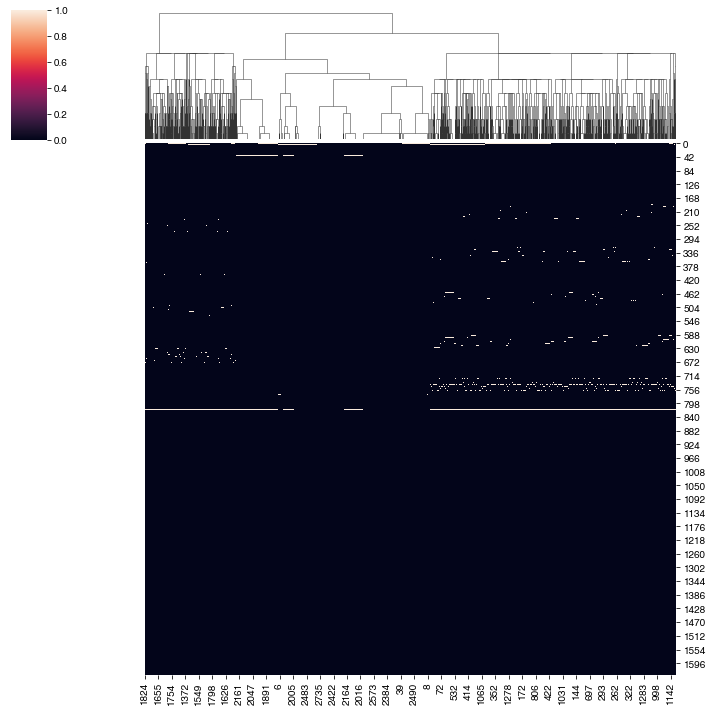

In [39]:
sns.clustermap(
    tu_matrix,
    method='complete',
    metric='hamming',
    col_cluster=True,
    row_cluster=False
)

Okay, so it's pretty clear that a TU will just be clustered based on the reading frames; and a gene will just cluster based on the amino acids present.

Maybe clustering intergenic regions will be more interesting.

## Promoters

Let's lump together some promoters and cluster them

In [69]:
promoters = [prom for prom in bitome.promoters if prom.transcription_unit is not None]
rpos_promoters = [p for p in promoters if 'Sigma54' in p.sigma_factors]

rpos_prom_mats = [
    bitome.extract(column_range=(p.location.start.position, p.location.end.position))
    for p in rpos_promoters
]
rpos_prom_mat_full = hstack(rpos_prom_mats).tocsc()
rpos_prom_mat_full.shape

(1634, 3969)

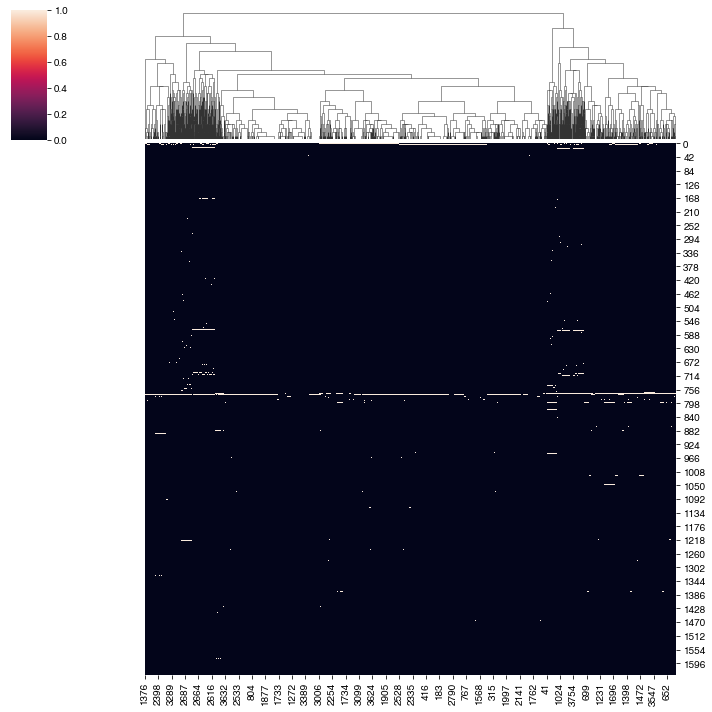

In [70]:
sns.clustermap(
    np.asarray(rpos_prom_mat_full.toarray()),
    method='complete',
    metric='hamming',
    col_cluster=True,
    row_cluster=False
)

In [71]:
cluster_out = _70

In [76]:
cluster_out.dendrogram_col.reordered_ind

[1376,
 3725,
 3720,
 3717,
 3714,
 3709,
 3713,
 3704,
 3696,
 3693,
 3686,
 3685,
 3658,
 3650,
 3656,
 3672,
 3670,
 3669,
 3659,
 3667,
 3679,
 3681,
 3690,
 3691,
 3705,
 3724,
 3722,
 3719,
 3718,
 3716,
 3711,
 3706,
 3710,
 3671,
 3674,
 3645,
 3702,
 3701,
 3697,
 3695,
 3684,
 3655,
 3654,
 3649,
 3651,
 3723,
 3708,
 3715,
 3676,
 3675,
 3668,
 3666,
 3665,
 3664,
 3663,
 3662,
 3660,
 3661,
 3688,
 3699,
 3694,
 3687,
 3683,
 3657,
 3652,
 3653,
 3680,
 3648,
 3646,
 3647,
 3721,
 3707,
 3712,
 3689,
 3692,
 3703,
 3700,
 3682,
 3698,
 3673,
 3677,
 3678,
 2409,
 2420,
 2416,
 2415,
 2412,
 2413,
 2407,
 2408,
 2393,
 2394,
 2385,
 2381,
 2382,
 2354,
 2357,
 2405,
 2400,
 2399,
 2398,
 2387,
 2377,
 2374,
 2372,
 2369,
 2367,
 2364,
 2365,
 2429,
 2427,
 2425,
 2424,
 2411,
 2419,
 2355,
 2403,
 2402,
 2391,
 2388,
 2386,
 2378,
 2375,
 2373,
 2363,
 2366,
 2422,
 2414,
 2421,
 2384,
 2359,
 2356,
 2353,
 2352,
 2351,
 2349,
 2350,
 2404,
 2401,
 2390,
 2389,
 2376,
 2368,